<a href="https://colab.research.google.com/github/Rappostor/MSIB-K2-KelasAwanPintar/blob/main/Data_Preprocessing_in_Action_Kelas_Awan_Pintar_Rizqi_Alif_Permana_Putra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing in Action

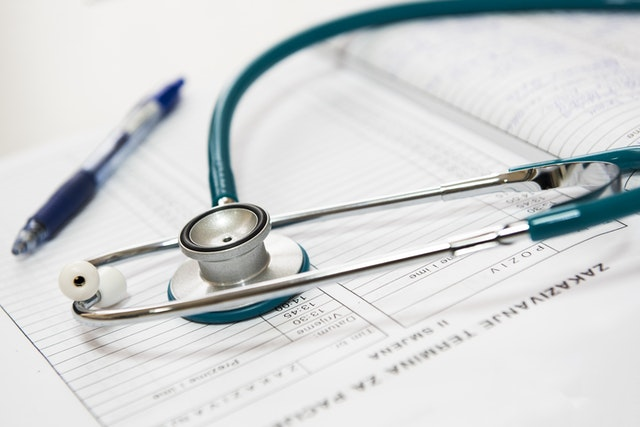

[Photo by Pixabay](https://www.pexels.com/photo/close-up-photo-of-a-stethoscope-40568/)

Bayangkan, kamu adalah seorang AI Engineer yang memiliki client seorang dokter terkenal.

Dokter tersebut ingin membuat sebuah AI yang dapat memprediksi Index pasiennya berdasarkan:
1. jenis kelamin (Gender),
2. tinggi badan (Height), dan
3. berat badan (Weight).

Berikut [ini](https://drive.google.com/file/d/1ySqXJCqelgiVk-xjbzsEPU4Dw5nhmpx0/view?usp=sharing) adalah dataset yang diberikan oleh sang dokter kepada kita.

In [3]:
import pandas as pd
import numpy as np

# library untuk menyembunyikan pesan warning
import warnings
warnings.filterwarnings("ignore")

# Load Data

Dataset terdiri atas 518 baris (observasi) dan 5 kolom. Sebagai seorang AI Engineer yang baik, kita tidak langsung menggunakan dataset ini untuk melatih model AI kita.

Kita harus memeriksa kualitas dataset terlebih dahulu.

In [4]:
df = pd.read_csv('patient_dataset.csv')

dataset = df.copy()
dataset.head()

,Name,Gender,Height,Weight,Index
0,Byron Farrell,Male,174.0,96.0,NaN
1,Kent Cotton,Male,189.0,87.0,Normal
2,Angela Skiver,Female,185.0,110.0,Obesity
3,Melisa Bobrow,Female,195.0,104.0,Overweight
4,Jared Chase,Male,149.0,61.0,Overweight


In [5]:
# ukuran dataset
dataset.shape

(518, 5)

# Data Cleaning - Handling Duplicate Data

Pertama, kita harus memastikan tidak ada data duplikat dalam dataset.

Setelah melakukan pemeriksaan, terdapat 14 baris (observasi) yang merupakan data duplikat.

14 baris ini harus kita hapus dari dataset.

In [6]:
# periksa jumlah data duplikat
dataset.duplicated().sum()

14

In [7]:
# hapus data duplikat
dataset.drop_duplicates(inplace=True)
dataset.shape

(504, 5)

# Data Reduction

Selanjutnya, kita mengurangi ukuran dataset dengan menghapus kolom yang tidak relevan.

Jika kita perhatikan, kolom **Name** sama sekali tidak dibutuhkan pada proses training. Nama pasien tidak bisa dijadikan sebagai pedoman dalam memprediksi Index.

Maka dari itu, kita harus menghapus kolom **Name** dari dataset.

In [8]:
# menghapus kolom yang tidak diperlukan
dataset = dataset.iloc[:, 1:]
dataset.head()

,Gender,Height,Weight,Index
0,Male,174.0,96.0,NaN
1,Male,189.0,87.0,Normal
2,Female,185.0,110.0,Obesity
3,Female,195.0,104.0,Overweight
4,Male,149.0,61.0,Overweight


# Data Cleaning

## Handling Missing Value

Langkah berikutnya, kita harus memastikan dataset dalam keadaan lengkap atau tidak ada *missing value*.

Setelah kita periksa, setiap kolom memiliki jumlah missing value yang berbeda-beda:
 - Gender memiliki 54 missing value
 - Height memiliki 31 missing value
 - Weight memiliki 36 missing value, dan
 - Index memiliki 40 missing value

In [9]:
# jumlah missing value pada tiap kolom
dataset.isnull().sum()

,0
Gender,54
Height,31
Weight,36
Index,40


Terdapat 2 metode dalam mengatasi missing value:
1. menghapus baris (observasi) yang memiliki missing value dari dataset
2. melakukan imputasi

Karena cukup banyak jumlah missing value dalam dataset, kita memutuskan untuk melakukan imputasi.

Imputasi adalah mengganti missing value dengan nilai tertentu, mean, median, atau modus.

Karena tiap kolom dataset memiliki jenis data yang berbeda-beda, maka kita harus menerapkan strategi imputasi yang berbeda-beda pula.

 - kolom Gender jenis datanya kategorik, maka strategi imputasi yang cocok adalah dengan modus.
 - kolom Height jenis datanya numerik, maka strategi imputasi yang cocok adalah dengan mean atau median.
 - kolom Weight jenis datanya numerik, maka strategi imputasi yang cocok adalah dengan mean atau median.
 - kolom Index jenis datanya kategorik, maka strategi imputasi yang cocok adalah dengan modus.

Kita memilih strategi imputasi dengan median untuk kolom Height dan Weight dengan alasan median lebih tahan outlier dinding mean.

In [10]:
gender_mode = dataset['Gender'].mode()
height_median = dataset['Height'].median()
weight_median = dataset['Weight'].median()
index_mode = dataset['Index'].mode()

print('Modus kolom Gender  : ', gender_mode[0])
print('Median kolom Height : ', height_median)
print('Median kolom Weight : ', weight_median)
print('Modus kolom Index   : ', index_mode[0])

Modus kolom Gender  :  Male
Median kolom Height :  171.0
Median kolom Weight :  105.0
Modus kolom Index   :  Extreme Obesity


In [11]:
# imputasi secara manual pada keempat kolom menggunakan function fillna
dataset['Gender'].fillna(gender_mode[0], inplace=True)
dataset['Height'].fillna(height_median, inplace=True)
dataset['Weight'].fillna(weight_median, inplace=True)
dataset['Index'].fillna(index_mode[0], inplace=True)

dataset.isnull().sum()

,0
Gender,0
Height,0
Weight,0
Index,0


Tidak terdapat lagi missing value dalam dataset setelah kita melakukan imputasi.

## Handling Outlier

Langkah selanjutnya, kita harus memastikan dataset kita terbebas dari outlier.

Terdapat beberapa cara memeriksa outlier dalam dataset, antara lain:



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

**Menggunakan Descriptive Statistics**

Periksa nilai minimum dan maksimum pada kolom numerik (Height dan Weight).

Jika kita perhatikan, terdapat outlier pada kedua kolom tersebut.
- kolom Height memiliki nilai maksimum 310
- kolom Weight memiliki nilai minimum 5

In [13]:
# meringkas dataset menggunakan descriptive statistics
dataset.describe(include='all')

,Gender,Height,Weight,Index
count,504,504.000000,504.000000,504
unique,2,NaN,NaN,6
top,Male,NaN,NaN,Extreme Obesity
freq,282,NaN,NaN,223
mean,NaN,170.509921,105.813492,NaN
std,NaN,17.728567,31.253229,NaN
min,NaN,140.000000,5.000000,NaN
25%,NaN,157.000000,82.000000,NaN
50%,NaN,171.000000,105.000000,NaN
75%,NaN,183.000000,132.250000,NaN


**Menggunakan Box Plot**

Kita juga dapat memeriksa outlier menggunakan box plot.

Buat box plot untuk setiap kolom numerik. Kemudian periksa outlier pada box plot yang telah dibuat.

Outlier ditampilkan dalam wujud titik di ujung kiri atau kanan box plot. Berdasarkan hasil pengamatan, semua kolom numerik dalam dataset memiliki outlier.

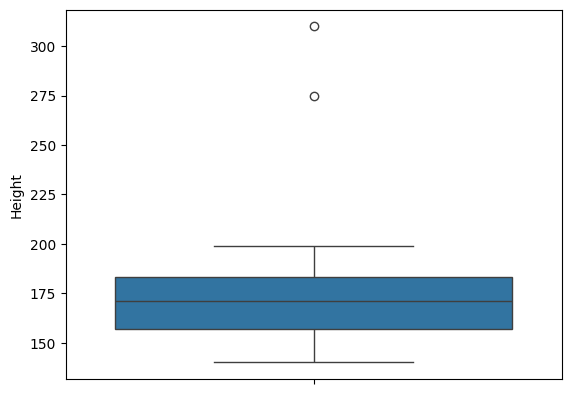

In [14]:
# memeriksa outlier pada kolom Height
sns.boxplot(dataset['Height'])
plt.show()

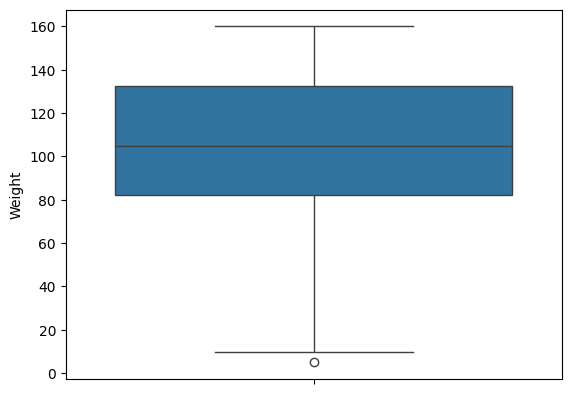

In [15]:
# memeriksa outlier pada kolom Weight
sns.boxplot(dataset['Weight'])
plt.show()

Terdapat dua metode yang bisa kita terapkan dalam mengatasi outlier:
1. menghapus baris yang memiliki outlier dari dalam dataset.
2. melakukan imputasi (seperti mengatasi missing value)

Karena jumlah outlier sedikit, kita memutuskan menghapus baris yang memiliki outlier dari dalam dataset.

In [16]:
kolom_numerik = ['Height', 'Weight']

# menghapus outliers dengan meanfaatkan Z-Score
# jika suatu baris memiliki Z-Score > 3, maka baris tersebut dihapus karena memiliki outlier
dataset = dataset[(np.abs(stats.zscore(dataset[kolom_numerik])) < 3).all(axis=1)]

# ukuran dataset
dataset.shape

(500, 4)

Sekarang hanya teresisa 500 baris (observasi) dan 4 kolom dalam dataset.

# Data Transformation - Label Encoding

Mari kita review kegiatan preprocessing yang sudah kita lakukan terhadap dataset, antara lain:
- menghapus data duplikat
- menghapus kolom yang tidak relevan
- menangani missing value dengan imputasi, dan
- menghpuas outlier

Bisa dikatakan, kualitas dataset kita saat ini sudah lebih baik dibanding data mentah (*raw data*) yang disediakan oleh sang dokter.

Kita sudah bisa men-training model menggunakan dataset. Namun masih ada kendala yang harus kita selesaikan sebelum melakukan training model, yakni mengubah kolom kategorik menjadi numerik.

Umumnya, model AI (Machine Learning dan Deep Learning) yang disediakan oleh library Python hanya menerima nilai numerik sebagai input. Kita akan mendapat pesan error jika kita mencoba meng-input nilai kategorik ke dalam model. Hal inilah yang menjadi alasan mengapa kita perlu mengubah kolom kategorik kita menjadi kolom numerik.

In [17]:
dataset.head()

,Gender,Height,Weight,Index
0,Male,174.0,96.0,Extreme Obesity
1,Male,189.0,87.0,Normal
2,Female,185.0,110.0,Obesity
3,Female,195.0,104.0,Overweight
4,Male,149.0,61.0,Overweight


Terdapat dua kolom kategorik yang harus kita ubah nilainya menjadi numerik, yaitu kolom Gender dan Index.

Kolom Gender memiliki 2 nilai unik, yakni:
- Male
- Gender

Sedangkan, kolom Index memiliki 6 nilai unik, yakni:
- Extremely Weak
- Weak
- Normal
- Overweight
- Obesity
- Extreme Obesity

Menurutmu, apa jenis data dari dua kolom ini berdasarkan skalanya?

In [18]:
print(dataset['Gender'].unique())
print(dataset['Index'].unique())

['Male' 'Female']
['Extreme Obesity' 'Normal' 'Obesity' 'Overweight' 'Weak' 'Extremely Weak']


Berdasarkan skalanya, jenis data kolom Gender adalah *Nominal*. Sementara itu, jenis data kolom Index adalah *Ordinal*.

Kita akan mengubah nilai dua kolom ini menjadi numerik menggunakan metode **Label Encoding** secara manual (tanpa bantuan library).


Pada kolom Gender, kita akan mengubah nilai:
- **Male** menjadi **0**
- **Female** menjadi **1**

> Pemberian nilai numerik dilakukan secara simbolis karena data kolom Gender berjenis Nominal.


Pada kolom Index, kita akan mengubah nilai:
- **Extremely Weak** menjadi **0**
- **Weak** menjadi **1**
- **Normal** menjadi **2**
- **Overweight** menjadi **3**
- **Obesity** menjadi **4**
- **Extreme Obesity** menjadi **5**

> Pemberian nilai numerik dilakukan secara berurut karena data kolom Idex berjenis Ordinal.

In [19]:
# label encoding secara manual dengan memanfaatkan fuction map()

# nominal
dataset['Gender'] = dataset['Gender'].map({'Male':0, 'Female':1})

# ordinal
dataset['Index'] = dataset['Index'].map({'Extremely Weak':0,
                                         'Weak':1,
                                         'Normal':2,
                                         'Overweight':3,
                                         'Obesity':4,
                                         'Extreme Obesity':5})

Kita telah berhasil mengubah kolom bernilai kategorik menjadi numerik.

In [20]:
print(dataset['Gender'].unique())
print(dataset['Index'].unique())

[0 1]
[5 2 4 3 1 0]


In [21]:
dataset.head()

,Gender,Height,Weight,Index
0,0,174.0,96.0,5
1,0,189.0,87.0,2
2,1,185.0,110.0,4
3,1,195.0,104.0,3
4,0,149.0,61.0,3


# Modeling

Setelah mempersiapkan dan meningkatkan kualitas dataset di tahap modeling, akhirnya dataset kita siap digunakan untuk mentraining model Machine Learning.

Mari kita ulas lagi **Problem Statement** client kita:

```
Client kita adalah seorang dokter yang ingin memprediksi Index pasiennya berdasarkan:
1. jenis kelamin (Gender),
2. tinggi badan (Height), dan
3. berat badan (Weight).
```

### Menurutmu teknik dan algoritma Machine Learning apa yang cocok untuk kasus ini?









Teknik Machine Learning yang cocok untuk kasus ini adalah Supervised Learning (SL).

Pada SL, dataset terdiri atas feature dan label. Feature dan label akan di-*mapping* untuk mendapat **rules**.

#### Menurutmu apa feature dan label dalam dataset ini?

Dalam dataset ini, featurenya adalah kolom:
- Gender
- Height
- Weight

Sedangkan, labelnya adalah kolom:
- Index



## Split Features & Label

Pisahkan feature dan label dalam dataset.

Simpan feature dalam variable **X** dan label dalam variable **y**.

In [22]:
X = dataset.drop(labels='Index', axis=1).values
y = dataset['Index'].values

## Handling Imbalanced Data

Kemudian, periksa apakah dataset kita memiliki data yang tidak seimbang (*Imbalanced Data*) atau tidak.

Berdasarkan hasil pemeriksaan, dataset kita memiliki data yang sangat tidak seimbang.
- Label 0 berjumlah 12 data
- Label 1 berjumlah 20 data
- Label 2 berjumlah 59 data
- Label 3 berjumlah 63 data
- Label 4 berjumlah 123 data
- Label 5 berjumlah 223 data

Ketidakseimbangan data dapat menyebabkan bias.

Bias adalah kecenderungan model yang memberikan hasil prediksi label mayoritas

Pada kasus ini, model akan lebih sering (cenderung) memberikan hasil prediksi label 5 dibanding label lainnya, karena jumlah data berlabel 5 yang sangat banyak, yakni 223 data.

In [23]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 12,  20,  59,  63, 123, 223]))

Berikut adalah beberapa hal yang bisa kita lakukan dalam mengatasi imbalanced data:
1. menggunakan algoritma machine learning yang tahan terhadap imbalanced data (contohnya Decision Tree)
2. melakukan resample (undersampling atau oversampling)

Kita memutuskan melakukan ovarsampling dengan bantuan module **[SMOTENC](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html)**.

Kita tidak menggunakan module SMOTE karena terdapat feature kategorik dalam dataset (kolom Gender). Sedangkan, module SMOTE tidak dapat membedakan feature kategorik dan numerik.

In [24]:
from imblearn.over_sampling import SMOTENC

Simpan feature dan label hasil oversampling dalam variable **X_res** dan **y_res**.

In [25]:
sm = SMOTENC(random_state=42, categorical_features=[0]) # feature ke nol (kolom Gender) merupakan feature kategorikal
X_res, y_res = sm.fit_resample(X, y)

Kini, dataset kita sudah terbebas dari imbalanced data.

Setiap label memiliki data berjumlah sama, yakni sebanyak 223 data.

In [26]:
np.unique(y_res, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([223, 223, 223, 223, 223, 223]))

In [27]:
# ukuran feature dan label setelah dilakukan oversampling
print(X_res.shape)
print(y_res.shape)

(1338, 3)
(1338,)


## Split Train Set & Test Set

Pisahkan feature dan label, hasil oversampling, menjadi train set dan test set menggunakan module [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Pembagian train set dan test set yang kita terapkan adalah 70:30.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

print('Train set size : ', X_train.shape, y_train.shape)
print('Test set size  : ', X_test.shape, y_test.shape)

Train set size :  (936, 3) (936,)
Test set size  :  (402, 3) (402,)


## Data Transformation - Standardization

Selanjutnya kita lakukan standardization pada **X_train** dan **X_test** menggunakan module [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)

# Standardization Feature
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Simpan hasil standardization dalam variable **X_train_scaled** dan **X_test_scaled**.

## Find the Best Model

Setelah melalui tahapan preprocessing yang panjang, akhirnya sampailah kita pada tahap training model.

Sebagai seorang AI Engineer yang baik, kita tidak hanya men-train satu model, melainkan banyak model dengan algortima dan *setting-*an hyperparameter yang berbeda-beda.


Kali ini kita akan mengimplementasikan 4 algortima SL, yakni:
- Decision Tree
- k-NN
- Support Vector Machine (SVM)
- Naive Bayes


Selain itu, kita juga akan menerapkan *setting*-an hyperparameter yang berbeda untuk setiap model.

Module [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) bisa membantu kita pada tahap ini.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### Build Model using Decision Tree

Model pertama yang kita training mengimplementasikan algoritma [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Setting-an hyperparameter yang kita gunakan adalah:
- max_dept = 2, 3, 4, 5, 6, 7, 8, 9, dan 10
- max_leaf_nodes = 2, 3, 4, 5, 6, 7, 8, 9, dan 10

Total model Decision Tree yang kita training berjumlah 81 model.

> **Note**: Decision Tree bisa menerima input X_train dan X_test tanpa perlu di-standardization terlebih dahulu. Karena hal itu, kita tidak menggunakan X_train_scaled dan X_test_scaled pada model Decision Tree.

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
# training model Decision Tree
hyperparameters = {'max_depth': list(range(2, 11)),
                   'max_leaf_nodes': list(range(2, 11))}

model_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), hyperparameters, cv=8, refit=True)

model_dt.fit(X_train, y_train)
print('Setting model Decision Tree terbaik :', model_dt.best_params_)

Setting model Decision Tree terbaik : {'max_depth': 5, 'max_leaf_nodes': 10}


Settingan hyperparameter terbaik untuk model Decision Tree:
- max_depth = 6
- max_leaf_nodes = 10

In [35]:
y_pred = model_dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.74      0.69      0.71        67
           2       0.47      0.67      0.56        67
           3       0.68      0.54      0.60        67
           4       0.63      0.70      0.66        67
           5       0.85      0.69      0.76        67

    accuracy                           0.70       402
   macro avg       0.73      0.70      0.71       402
weighted avg       0.73      0.70      0.71       402



Selanjutnya kita periksa performa model Decision Tree dengan settingan hyperparameter terbaik dengan bantuan module [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Didapatkan performa model sebagai berikut:
- precision = 72%
- recall = 69%
- accuracy = 69%

Note: karena dataset kita seimbang (tidak memiliki imbalanced data), maka kita menggunakan **macro avg**.

### Build Model using k-NN

Model kedua yang kita training mengimplementasikan algoritma [k-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Setting-an hyperparameter yang kita gunakan adalah:
- n_neighbors = 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, dan 20

Total model Decision Tree yang kita training berjumlah 19 model.

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# training model k-NN
hyperparameters = {'n_neighbors': list(range(2, 21))}

model_knn = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=8, refit=True)

model_knn.fit(X_train_scaled, y_train)
print('Setting model k-NN terbaik :', model_knn.best_params_)

Setting model k-NN terbaik : {'n_neighbors': 3}


Settingan hyperparameter terbaik untuk model k-NN:
- n_neighbors = 3

In [38]:
y_pred = model_knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.86      0.93      0.89        67
           2       0.94      0.75      0.83        67
           3       0.74      0.84      0.78        67
           4       0.77      0.79      0.78        67
           5       0.83      0.79      0.81        67

    accuracy                           0.84       402
   macro avg       0.85      0.84      0.84       402
weighted avg       0.85      0.84      0.84       402



Selanjutnya kita periksa performa model k-NN dengan settingan hyperparameter terbaik dengan bantuan module classification_report.

Didapatkan performa model sebagai berikut:
- precision = 86%
- recall = 85%
- accuracy = 85%

Note: karena dataset kita seimbang (tidak memiliki imbalanced data), maka kita menggunakan **macro avg**.

### Build Model using SVM

Model ketiga yang kita training mengimplementasikan algoritma [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

Setting-an hyperparameter yang kita gunakan adalah:
- C = 0.1, 1, 10, 100, dan 1000
- kernel = rbf, sigmoid
- gamma = 1, 0.1, 0.01, 0.001, dan 0.0001

Total model Decision Tree yang kita training berjumlah 50 model.

In [39]:
  from sklearn.svm import SVC

In [40]:
# training model SVM
hyperparameters = {'C': [0.1, 1, 10, 100, 1000],
                   'kernel': ['rbf', 'sigmoid'],
                   'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

model_svm = GridSearchCV(SVC(), hyperparameters, cv=8, refit=True)

model_svm.fit(X_train_scaled, y_train)
print('Setting model SVM terbaik :', model_svm.best_params_)

Setting model SVM terbaik : {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


Settingan hyperparameter terbaik untuk model SVM:
- C = 100
- gamma = 1
- kernel = rbf

In [41]:
y_pred = model_svm.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.85      0.91      0.88        67
           2       0.96      0.79      0.87        67
           3       0.72      0.84      0.77        67
           4       0.77      0.85      0.81        67
           5       0.89      0.76      0.82        67

    accuracy                           0.85       402
   macro avg       0.86      0.85      0.85       402
weighted avg       0.86      0.85      0.85       402



Selanjutnya kita periksa performa model SVM dengan settingan hyperparameter terbaik dengan bantuan module classification_report.

Didapatkan performa model sebagai berikut:
- precision = 86%
- recall = 85%
- accuracy = 85%

Note: karena dataset kita seimbang (tidak memiliki imbalanced data), maka kita menggunakan **macro avg**.

### Build Model using Naive Bayes

Model terakhir yang kita training mengimplementasikan algoritma [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) tanpa setting-an hyperparameter tertentu.

Kita tidak perlu melatih model menggunakan module GridSearchCV karena kita tidak men-setting hyperparameter model.

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)

GaussianNB()

In [44]:
y_pred = model_nb.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.63      0.76        67
           1       0.43      0.99      0.60        67
           2       0.56      0.54      0.55        67
           3       0.60      0.27      0.37        67
           4       0.60      0.48      0.53        67
           5       0.81      0.70      0.75        67

    accuracy                           0.60       402
   macro avg       0.66      0.60      0.59       402
weighted avg       0.66      0.60      0.59       402



Performa model naive bayes berdasarkan hasil classification_report:
- precision = 63%
- recall = 60%
- accuracy = 60%

Note: karena dataset kita seimbang (tidak memiliki imbalanced data), maka kita menggunakan **macro avg**.

# Modeling with Best Model

Setelah men-training model dengan berbagai algoritma dan setting-an hyperparameter, kita bandingkan perfoma tiap model.


Algorita | Precision | Recall | Accuracy
--- | --- | --- | --- |
Decision Tree | 72% | 69% | 69% |
k-NN | 86% | 85% | 85%
SVM | 86% | 85% | 85%
Naive Bayes | 63% | 63% | 60%



Terlihat dua model dengan performa tertinggi yakni k-NN dan SVM. Karena kedua model memiliki nilai precision, recall, dan accuracy yang sama, kita bebas memilih satu model untuk kita deploy.

Kita putuskan memilih model SVM untuk dideploy.

Selanjutnya, buat model SVM dengan setting-an hyperparameter terbaik tanpa GridSearchCV.

In [45]:
best_model = SVC(C=100, gamma=1, kernel='rbf')
best_model.fit(X_train_scaled, y_train)

SVC(C=100, gamma=1)

Lakukan prediksi data baru menggunakan model tersebut.

In [46]:
# input data baru
jenis_kelamin = 0 #@param [0, 1]{type:"raw"}
tinggi_badan = 168#@param {type:"number"}
berat_badan = 84#@param {type:"number"}

# data baru yang diinput harus di-standardization terlebih dahulu
data_baru = [[jenis_kelamin, tinggi_badan, berat_badan]]
data_baru = scaler.transform(data_baru)

# prediksi data baru, yang sudah di-standardization, menggunakan model SVM terbaik
hasil_prediksi = best_model.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)

print('Hasil prediksi index Anda adalah ', end='')
if hasil_prediksi == 0:
  print('Extremely Weak')
elif hasil_prediksi == 1:
  print('Weak')
elif hasil_prediksi == 2:
  print('Normal')
elif hasil_prediksi == 3:
  print('Overweight')
elif hasil_prediksi == 4:
  print('Obesity')
else:
  print('Extremely Obesity')

Hasil prediksi index Anda adalah Overweight


## Save Model & Preprocessing

Model SVM terbaik siap kita deploy.

Save model dan scaler object (preprocessing function) menggunakan library [pickle](https://docs.python.org/3/library/pickle.html).

In [47]:
import pickle

In [48]:
# menyimpan scaler object (preprocessing StandardScaler), scaler object dibutuhkan untuk men-standardization data baru
pickle.dump(scaler, open('scaler_DPA.pkl', 'wb'))

# menyimpan model terbaik
pickle.dump(best_model, open('model_DPA.pkl', 'wb'))

Jangan lupa download **model.pkl** dan **scaler.pkl** melalui side menu Colab.

Selamat kita telah mendapat model yang siap kita deploy dalam aplikasi.
Cukup banyak tahapan yang harus kita lalui demi mendapat model tersebut.

# Contoh Hasil Deployment

# Challenge

Cobalah lakukan tahap data preprocessing hingga modeling pada kasus Unsupervised Learning. Dataset bebas.

[Contoh dataset yang direkomendasikan](https://drive.google.com/file/d/1fP8c8EO-FXB8VdXdDvMLr33Huww9gl_A/view?usp=sharing).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     226 non-null    int64  
 1   Gender         194 non-null    object 
 2   Age            193 non-null    float64
 3   AnnualIncome   197 non-null    float64
 4   SpendingScore  196 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 9.0+ KB
None
   CustomerID  Gender   Age  AnnualIncome  SpendingScore
0           1    Male  19.0          15.0           39.0
1           2    Male  21.0          15.0           81.0
2           3     NaN  20.0          16.0            6.0
3           4  Female  23.0          16.0           77.0
4           5  Female  31.0           NaN           40.0
CustomerID        0
Gender           32
Age              33
AnnualIncome     29
SpendingScore    30
dtype: int64


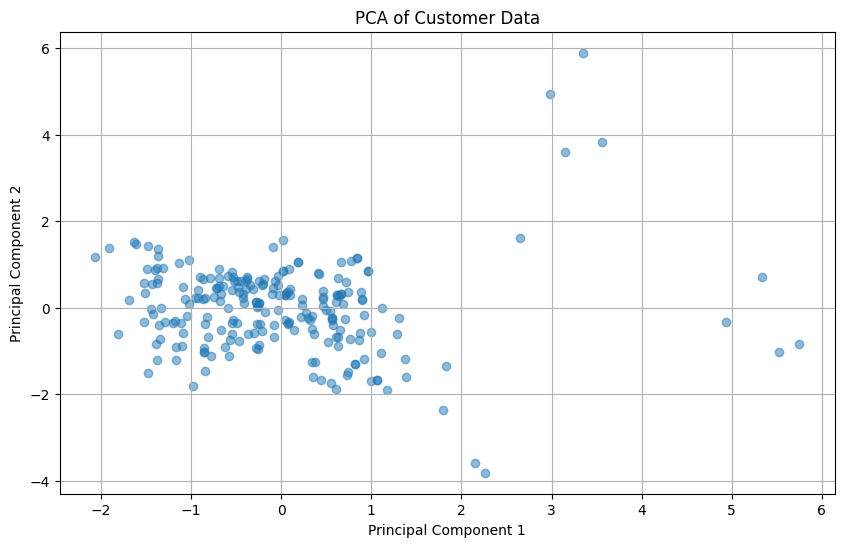

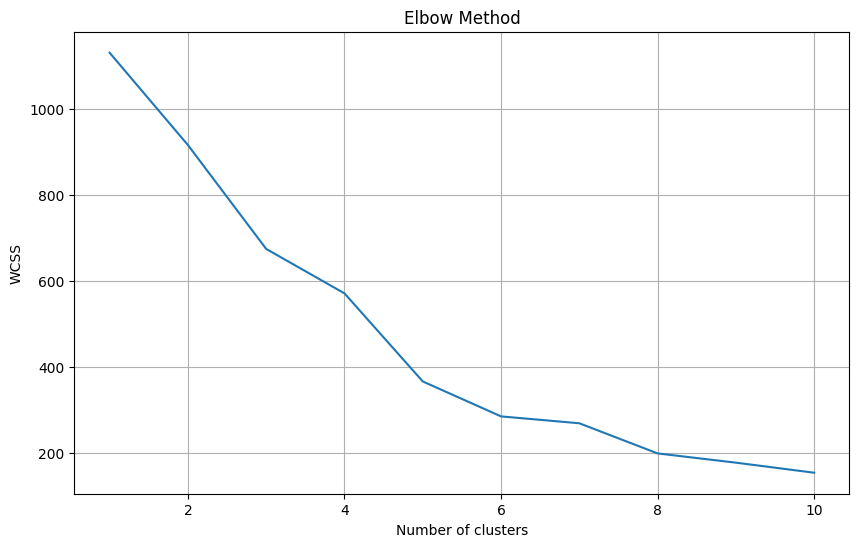

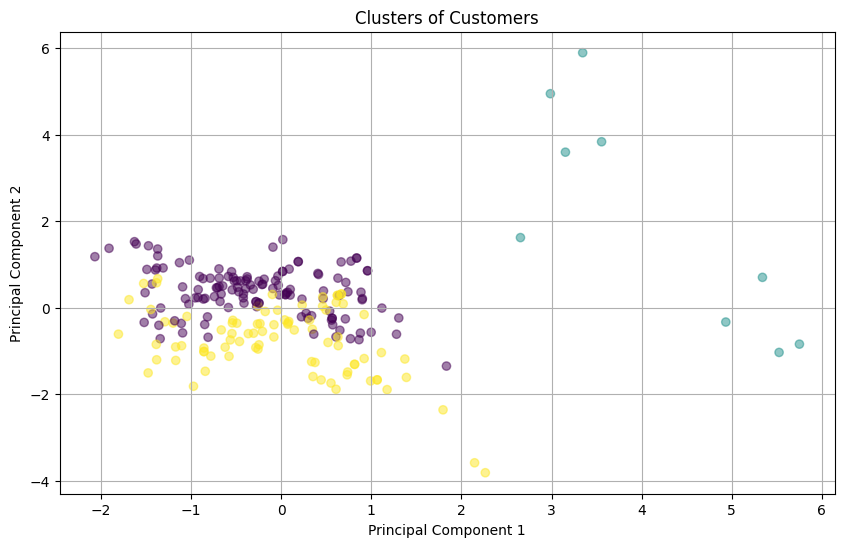

Hasil clustering disimpan ke 'customer_dataset_with_clusters.csv'


In [50]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Load Dataset
data = pd.read_csv('customer_dataset.csv')

# Tampilkan informasi dan beberapa baris pertama
print(data.info())
print(data.head())

# 2. Data Cleaning
# Cek nilai yang hilang
print(data.isnull().sum())

# Memisahkan kolom numerik dan kategorikal
numerical_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Mengisi nilai yang hilang pada kolom numerik dengan rata-rata
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Mengisi nilai yang hilang pada kolom kategorikal dengan modus
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# 3. Data Encoding (Jika Diperlukan)
# Menggunakan one-hot encoding untuk kolom kategori
data = pd.get_dummies(data, drop_first=True)

# 4. Standardisasi Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 5. Visualisasi Data (Opsional)
# Menggunakan PCA untuk mereduksi dimensi dan visualisasi
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], alpha=0.5)
plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# 6. Modeling: Clustering dengan KMeans
# Tentukan jumlah cluster yang optimal menggunakan metode elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Misalkan kita memilih 3 cluster
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Menambahkan label cluster ke dataset asli
data['Cluster'] = clusters

# 7. Evaluasi Hasil Clustering
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('Clusters of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# 8. Simpan Hasil (Opsional)
data.to_csv('customer_dataset_with_clusters.csv', index=False)
print("Hasil clustering disimpan ke 'customer_dataset_with_clusters.csv'")
